In [ ]:
# Run this when it's first time to build the pym.splite3
from owlready2 import *
from owlready2.pymedtermino2 import *
from owlready2.pymedtermino2.umls import *

default_world.set_backend(filename = "/data/joe/pym.sqlite3")
import_umls("/data/joe/umls-2022AA-full.zip", terminologies = ["SNOMEDCT_US", "CUI"])
default_world.save()

In [2]:
# Run this when reload the pysqlite3
# If the error is "sqlite3.OperationalError: database is locked", try to run the following command:
# cp /data/joe/pym.sqlite3 /data/joe/pym.sqlite3.bak
# rm /data/joe/pym.sqlite3
# mv /data/joe/pym.sqlite3.bak /data/joe/pym.sqlite3
from owlready2 import *
from owlready2.pymedtermino2 import umls
from owlready2.pymedtermino2.model import Concepts
umls.default_world.set_backend(filename = "/data/joe/pym.sqlite3")

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [3]:
PYM = get_ontology("http://PYM/").load()
SNOMEDCT_US = PYM["SNOMEDCT_US"]
CUI = PYM["CUI"]

In [4]:
import seaborn as sns

def sort_two_lists(list1, list2):
    zipped_lists = zip(list1, list2)
    sorted_pairs = sorted(zipped_lists, key=lambda pair: pair[1])

    tuples = zip(*sorted_pairs)
    list1, list2 = [ list(tuple) for tuple in  tuples]
    return list1, list2

In [5]:
import spacy
from medspacy.context import ConTextComponent
from medspacy.visualization import visualize_ent
from scispacy.linking import EntityLinker
nlp = spacy.load("en_core_sci_sm")
nlp.add_pipe("scispacy_linker", config={"resolve_abbreviations": True, "linker_name": "umls"})
nlp.add_pipe("medspacy_context")

Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/requests/models.py:176: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if isinstance(hook, collections.Callable):
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to un

In [22]:
def plot_concept_freq(text, visulization=False, remove_negated_entity=True):
    doc = nlp(text)
    if visulization:
        visualize_ent(doc)
    umls_concepts = Concepts()

    # Each entity is linked to UMLS with a score
    # (currently just char-3gram matching).
    # linker = nlp.get_pipe("scispacy_linker")
    for entity in doc.ents:
        if remove_negated_entity and entity._.is_negated:
            continue
        for umls_ent in entity._.kb_ents:
            # print(linker.kb.cui_to_entity[umls_ent[0]])
            # print(umls_ent[0])
            if CUI[umls_ent[0]] and CUI[umls_ent[0]].name:
                umls_concepts.add(CUI[umls_ent[0]])
                break
    # print(umls_concepts)
    snomed_concepts = umls_concepts >> SNOMEDCT_US
    level_1 = SNOMEDCT_US["138875005"].children # root
    # level_1 = SNOMEDCT_US["404684003"].children # clinical findings
    # level_1 = SNOMEDCT_US["48176007"].children # clinical findings
    count_dic = {}
    for s_c in list(snomed_concepts):
        while s_c.parents:
            s_c = s_c.parents[0]
            if s_c in level_1:
                count_dic[s_c.name] = count_dic.get(s_c.name, 0) + 1
                break
    # print(count_dic)
    s_names, counts = sort_two_lists(list(count_dic.keys()), list(count_dic.values()))
    s_labels = [str(SNOMEDCT_US[s_name].label[0]) for s_name in s_names]
    # print(s_labels, counts)
    sns.barplot(y=s_labels, x=counts)

/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]


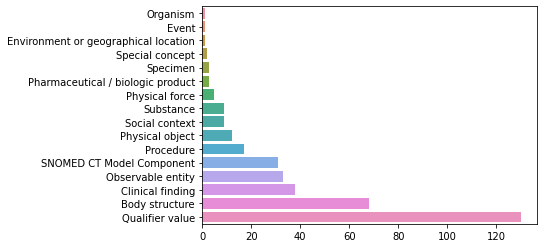

In [23]:

with open("example_article1.txt") as f:
    text = f.read()
plot_concept_freq(text, visulization=False)
# text = "Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals."

/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]


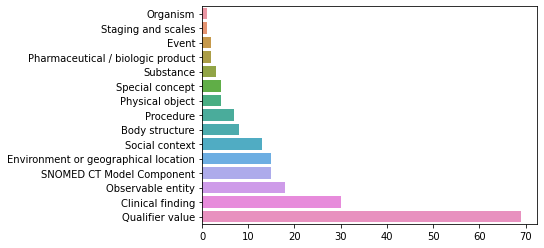

In [24]:
with open("example_article2.txt") as f:
    text = f.read()
plot_concept_freq(text)

/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]


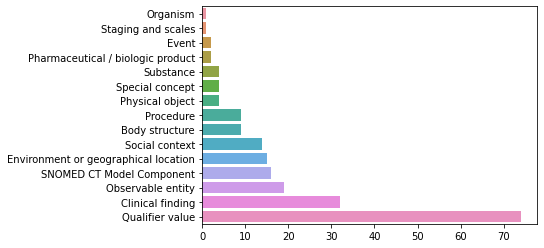

In [25]:
with open("example_article2.txt") as f:
    text = f.read()
plot_concept_freq(text, remove_negated_entity=False, visulization=True)

In [70]:
SNOMEDCT_US["138875005"].children

[SNOMEDCT_US["105590001"] # Substance,
 SNOMEDCT_US["123037004"] # Body structure,
 SNOMEDCT_US["123038009"] # Specimen,
 SNOMEDCT_US["243796009"] # Situation with explicit context,
 SNOMEDCT_US["254291000"] # Staging and scales,
 SNOMEDCT_US["260787004"] # Physical object,
 SNOMEDCT_US["272379006"] # Event,
 SNOMEDCT_US["308916002"] # Environment or geographical location,
 SNOMEDCT_US["362981000"] # Qualifier value,
 SNOMEDCT_US["363787002"] # Observable entity,
 SNOMEDCT_US["370115009"] # Special concept,
 SNOMEDCT_US["373873005"] # Pharmaceutical / biologic product,
 SNOMEDCT_US["404684003"] # Clinical finding,
 SNOMEDCT_US["410607006"] # Organism,
 SNOMEDCT_US["419891008"] # Record artifact,
 SNOMEDCT_US["48176007"] # Social context,
 SNOMEDCT_US["71388002"] # Procedure,
 SNOMEDCT_US["78621006"] # Physical force,
 SNOMEDCT_US["900000000000441003"] # SNOMED CT Model Component]

In [10]:
SNOMEDCT_US["404684003"].children

[SNOMEDCT_US["102957003"] # Neurological finding,
 SNOMEDCT_US["105499002"] # Convalescence,
 SNOMEDCT_US["106028002"] # Musculoskeletal finding,
 SNOMEDCT_US["106030000"] # Muscle finding,
 SNOMEDCT_US["106048009"] # Respiratory finding,
 SNOMEDCT_US["106063007"] # Cardiovascular finding,
 SNOMEDCT_US["106077005"] # Integumentary system finding,
 SNOMEDCT_US["106089007"] # Metabolic finding,
 SNOMEDCT_US["106112009"] # Fetal finding,
 SNOMEDCT_US["106132005"] # Speech finding,
 SNOMEDCT_US["106176003"] # Endocrine finding,
 SNOMEDCT_US["107650008"] # Color finding,
 SNOMEDCT_US["1148601009"] # Able to thrive,
 SNOMEDCT_US["1156072000"] # Device finding,
 SNOMEDCT_US["1157021003"] # Blood oxygen pressure within reference range,
 SNOMEDCT_US["116336009"] # Eating / feeding / drinking finding,
 SNOMEDCT_US["118188004"] # Finding of neonate,
 SNOMEDCT_US["118219009"] # Male sexual finding,
 SNOMEDCT_US["118222006"] # General finding of observation of patient,
 SNOMEDCT_US["118228005"] # F

In [ ]:
import pandas as pd

In [13]:
doc = nlp("I have a cough.")
visualize_ent(doc)

/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
/data/anaconda3/envs/scispacy/lib/python3.7/site-packages/scispacy/candidate_generation.py:285: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]


In [23]:
CUI[doc.ents[0]._.kb_ents[0][0]] >> SNOMEDCT_US

Concepts([
  SNOMEDCT_US["49727002"] # Cough
, SNOMEDCT_US["263731006"] # Coughing
])